In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [2]:


# Cargar el dataset
file_path = 'Matriculas_Original.csv'
# Intentar con diferentes delimitadores
df = pd.read_csv(file_path, encoding='utf8', delimiter=';') 
##df = pd.read_csv(file_path, encoding='latin1', delimiter=';')  # Por ejemplo, si el delimitador es punto y coma
##df = pd.read_csv(file_path, encoding='latin1')  # Usa 'latin1' para manejar caracteres especiales

C:\Users\deyvi.caicedo\AppData\Local\Temp\ipykernel_31480\168567416.py:4: DtypeWarning: Columns (3,23,25,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf8', delimiter=';')


In [3]:
# Mostrar las primeras filas del DataFrame
print(df.head())

# Información general sobre el DataFrame
print(df.info())

# Estadísticas descriptivas
print(df.describe(include='all'))

# Verificar valores faltantes
print(df.isnull().sum())


   Interlocutor  Nombres  Apellidos Documento  Centro de costo  Ofi de ventas  \
0          4397      NaN        NaN       NaN       24103234.0            NaN   
1          4553      NaN        NaN       NaN       22003156.0            NaN   
2          4766      NaN        NaN       NaN       27203201.0            NaN   
3          4879      NaN        NaN       NaN       24103189.0            NaN   
4          5529      NaN        NaN       NaN       22003464.0            NaN   

   Crédito  Matr. Académica Matr. Financiera  Periodo Académico  ...  \
0      NaN              NaN              exc             201615  ...   
1      NaN              NaN               SI             201610  ...   
2      NaN              NaN               SI             201615  ...   
3      NaN              NaN               SI             201610  ...   
4      NaN              NaN               SI             201610  ...   

  Ingreso neto Créditos Adicionales Ingreso neto Total Categoría   Modalidad  \


In [11]:
# Seleccionar las columnas específicas
columnas_deseadas = [
    'Centro de costo',
    #'Matr. Financiera',
    'Periodo Académico',
    #'Categoría periodo académico',
    #'Nivel Académico',
    #'Nivel Formación',
    #'Tipo estudiante',
    #'Cant matricula',
    'Ingreso bruto',
    'Beca',
    'Descuento',
    'Desc. Pronto pago',
    'Patrocinio',
    'Recargo',
    'Subsidio',
    'Crédito convenio2',
    'Crédito icetex',
    'Ingreso neto',
    #'Categoría',
    #'Modalidad',
    'Año',
    #'Rectoria',
    #'Sede'
]

# Seleccionar solo las columnas deseadas del DataFrame
df_seleccionado = df[columnas_deseadas]


In [5]:
# Información general sobre el DataFrame
print(df_seleccionado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924122 entries, 0 to 1924121
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Centro de costo              float64
 1   Periodo Académico            int64  
 2   Categoría periodo académico  object 
 3   Nivel Académico              object 
 4   Nivel Formación              object 
 5   Tipo estudiante              object 
 6   Cant matricula               object 
 7   Ingreso bruto                object 
 8   Beca                         float64
 9   Descuento                    float64
 10  Desc. Pronto pago            int64  
 11  Patrocinio                   float64
 12  Recargo                      float64
 13  Subsidio                     object 
 14  Crédito convenio2            float64
 15  Crédito icetex               object 
 16  Ingreso neto                 object 
 17  Categoría                    object 
 18  Modalidad                    object 
 19  

In [6]:
df.replace({',': '.'}, regex=True, inplace=True)
df.replace({'exc': 'SI'}, regex=True, inplace=True)

In [8]:
# Identificar las columnas categóricas
columnas_categoricas = [
    #'Matr. Financiera',
    'Categoría periodo académico',
    'Nivel Académico',
    'Nivel Formación',
    'Tipo estudiante',
    'Cant matricula',
    'Categoría',
    'Modalidad',
    'Rectoria',
    'Sede'
]

# Aplicar codificación one-hot a las columnas categóricas
df_dummies = pd.get_dummies(df_seleccionado, columns=columnas_categoricas)

print(df_dummies.head())

   Centro de costo  Periodo Académico Ingreso bruto  Beca  Descuento  \
0       24103234.0             201615       1534000   0.0        0.0   
1       22003156.0             201610    1906999,98   0.0        0.0   
2       27203201.0             201615       1534000   0.0        0.0   
3       24103189.0             201610       1907000   0.0        0.0   
4       22003464.0             201610       2751000   0.0        0.0   

   Desc. Pronto pago  Patrocinio  Recargo Subsidio  Crédito convenio2  ...  \
0                  0         0.0      0.0   430000                0.0  ...   
1                  0         0.0      0.0        0                0.0  ...   
2                  0         0.0  82600.0   708000                0.0  ...   
3                  0         0.0      0.0   326000                0.0  ...   
4              82530         0.0      0.0        0                0.0  ...   

  Sede_CU Valle de Aburrá Sede_CU Valle de Aburrá Sur  Sede_CU Villaciencio  \
0                  

In [9]:
df_dummies

,Centro de costo,Periodo Académico,Ingreso bruto,Beca,Descuento,Desc. Pronto pago,Patrocinio,Recargo,Subsidio,Crédito convenio2,...,Sede_CU Valle de Aburrá,Sede_CU Valle de Aburrá Sur,Sede_CU Villaciencio,Sede_CU Villavicencio,Sede_CU Villeta,Sede_CU Virtual,Sede_CU Virtual-Distancia,Sede_CU Yopal,Sede_CU Zipaquirá,Sede_Cun Buenaventura
0,24103234.0,201615,1534000,0.0,0.0,0,0.0,0.0,430000,0.0,...,False,False,False,False,False,False,False,False,False,False
1,22003156.0,201610,"1906999,98",0.0,0.0,0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,27203201.0,201615,1534000,0.0,0.0,0,0.0,82600.0,708000,0.0,...,False,False,False,False,False,False,False,False,False,False
3,24103189.0,201610,1907000,0.0,0.0,0,0.0,0.0,326000,0.0,...,False,False,False,False,False,False,False,False,False,False
4,22003464.0,201610,2751000,0.0,0.0,82530,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924117,23003266.0,202445,1202450,0.0,300613.0,0,0.0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1924118,23003482.0,202445,4368100,0.0,0.0,133220,0.0,0.0,1703700,0.0,...,False,False,False,False,False,False,False,False,False,False
1924119,23103817.0,202413,3500700,0.0,610170.0,71187,0.0,0.0,1466800,0.0,...,False,False,False,False,False,True,False,False,False,False
1924120,23103329.0,202429,5540900,0.0,0.0,243350,0.0,0.0,673900,0.0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Reemplazar comas por puntos en todo el DataFrame
df.replace({',': '.'}, regex=True, inplace=True)
df.replace({'exc': 'SI'}, regex=True, inplace=True)
df.replace({'SI': '1'}, regex=True, inplace=True)
df.replace({'NO': '0'}, regex=True, inplace=True) 
df.replace({'Pregrado': '1'}, regex=True, inplace=True)
df.replace({'Posgrado': '2'}, regex=True, inplace=True)

In [ ]:
# NO UTILIZAR 
df.replace({'SEMESTRAL PREGRADO PRESENCIAL': '1'}, regex=True, inplace=True)
df.replace({'SEMESTRAL PREGRADO DISTANCIA': '2'}, regex=True, inplace=True)
df.replace({'SEMESTRAL POSGRADO PRESENCIAL': '3'}, regex=True, inplace=True)
df.replace({'SEMESTRAL POSGRADO DISTANCIA': '4'}, regex=True, inplace=True)
df.replace({'CUATRIMESTRAL PREGRADO DISTANCIA': '5'}, regex=True, inplace=True)
df.replace({'CUATRIMESTRAL POSGRADO DISTANCIA': '6'}, regex=True, inplace=True)
df.replace({'CUATRIMESTRAL POSGRADO PRESENCIAL': '7'}, regex=True, inplace=True)
df.replace({'CUATRIMESTRAL PREGRADO PRESENCIAL': '8'}, regex=True, inplace=True)

In [ ]:

# Inicializar el codificador one-hot
encoder = OneHotEncoder(sparse_output=False)  # Reemplazado 'sparse' por 'sparse_output'

# Aplicar la codificación
encoded = encoder.fit_transform(df[['Categoría periodo académico']])




# Aplicar la codificación
encoded = encoder.fit_transform(df[['Categoría periodo académico','Categoría','Modalidad',]])

# Crear un DataFrame con las columnas one-hot
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['categoria']))

# Concatenar con el DataFrame original
df = pd.concat([df, df_encoded], axis=1)



In [ ]:
 encoded

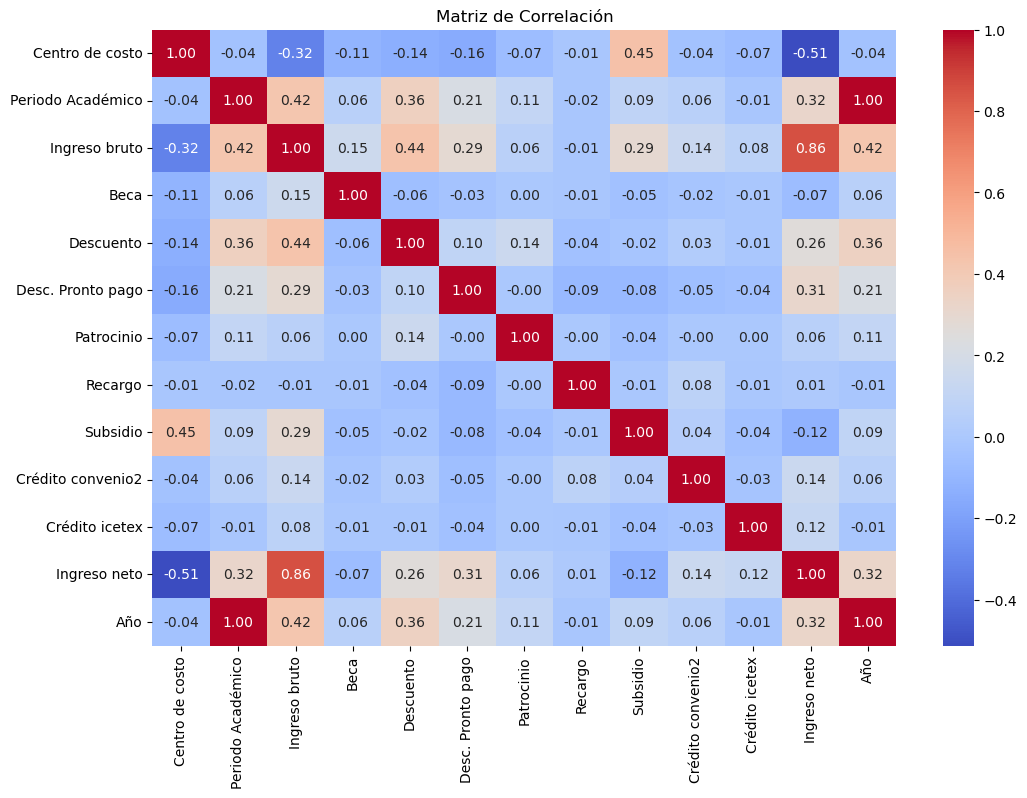

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlaciones
correlation_matrix = df_seleccionado.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Mostrar las primeras filas del DataFrame
print(df.head())

In [ ]:
# Verificar valores faltantes
print(df.isnull().sum())

In [ ]:
# Histograma de ingresos brutos
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingreso bruto'], kde=True, bins=30)
plt.title('Distribución del Ingreso Bruto')
plt.xlabel('Ingreso Bruto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot del Ingreso Neto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ingreso neto', data=df)
plt.title('Boxplot del Ingreso Neto')
plt.xlabel('Ingreso Neto')
plt.show()


In [ ]:
# Análisis de la distribución de tipos de estudiante
plt.figure(figsize=(10, 6))
sns.countplot(y='Tipo estudiante', data=df)
plt.title('Distribución de Tipos de Estudiante')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Estudiante')
plt.show()

# Comparación de ingresos brutos por categoría de período académico
plt.figure(figsize=(12, 8))
sns.boxplot(x='Categoría periodo académico', y='Ingreso bruto', data=df)
plt.xticks(rotation=45)
plt.title('Ingreso Bruto por Categoría de Período Académico')
plt.xlabel('Categoría de Período Académico')
plt.ylabel('Ingreso Bruto')
plt.show()


In [ ]:
# Convertir columnas con valores numéricos en formato de texto a numéricos
df['Ingreso bruto'] = pd.to_numeric(df['Ingreso bruto'].str.replace(',', ''), errors='coerce')
df['Ingreso neto'] = pd.to_numeric(df['Ingreso neto'].str.replace(',', ''), errors='coerce')

# Llenar valores faltantes (opcional, dependiendo de tu análisis)
df.fillna(0, inplace=True)
